<a href="https://colab.research.google.com/github/anpanz/ITB_mining/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C(%EC%86%A1%EC%A7%80%EC%97%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 파악하기**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_data.csv")

display(health.head(10)) # 처음 10행 확인
print(health.info())     # 10000행의 데이터

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [4]:
health.shape

(10000, 31)

In [5]:
# 기준년도,가입자일련번호,데이터공개일자,시도코드,청력(좌),청력(우),흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석은 숫자로 계산할 필요가 없는 값이므로 문자로 변환
health['기준년도'] = health['기준년도'].astype(str)
health['가입자일련번호'] = health['가입자일련번호'].astype(str)
health['데이터공개일자'] = health['데이터공개일자'].astype(str)
health['시도코드'] = health['시도코드'].astype(str)
health['청력(좌)'] = health['청력(좌)'].astype(str)
health['청력(우)'] = health['청력(우)'].astype(str)
health['흡연상태'] = health['흡연상태'].astype(str)
health['음주여부'] = health['음주여부'].astype(str)
health['구강검진수검여부'] = health['구강검진수검여부'].astype(str)
health['치아우식증유무'] = health['치아우식증유무'].astype(str)
health['치석'] = health['치석'].astype(str)

# 모든 수치 데이터의 기초 통계량 보여주기
health.describe(include='all') 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9912.000000,9912.00000,9912.000000,9912.000000,10000,10000,10000,10000,10000,10000
unique,1,10000,17,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,2,3,4,1
top,2020,1,41,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Yes,0,nan,nan,12/29/2021
freq,10000,1,2495,5138,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6231,5819,6749,6749,6749,10000
mean,NaN,NaN,NaN,NaN,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,...,0.848484,27.58979,26.789851,38.098668,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,...,0.301012,17.88442,23.735687,58.184579,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,...,0.050000,3.00000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,0.700000,20.00000,16.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,0.800000,24.00000,21.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,...,1.000000,30.00000,31.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN


# **2. 데이터 탐색과 시각화**

In [8]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

Selecting previously unselected package fonts-nanum.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSqu

In [9]:
시도코드_count = health['시도코드'].value_counts()
print(시도코드_count[:17]) 

41    2495
11    1644
26     681
48     663
28     561
47     523
27     495
44     430
46     395
45     392
42     343
30     331
43     323
29     280
31     244
49     123
36      77
Name: 시도코드, dtype: int64


In [11]:
시도코드_count = health['시도코드'].value_counts()
print(시도코드_count[:5]) 

41    2495
11    1644
26     681
48     663
28     561
Name: 시도코드, dtype: int64


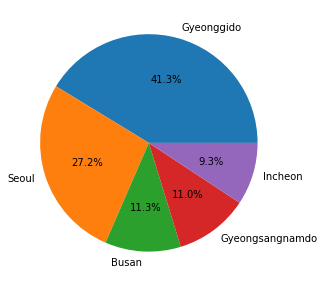

In [12]:
fm._rebuild()  # 폰트 적용

x = [2495, 1644, 681, 663, 561]
y = ['Gyeonggido', 'Seoul', 'Busan', 'Gyeongsangnamdo','Incheon']

plt.figure(figsize=(5,5))
plt.pie(x, labels= y, autopct='%.1f%%')  #autopct: format for values
plt.show()

#수진자들의 거주지 중 가장 비율이 높은 다섯개 지역은 경기도, 서울특별시, 부산광역시, 경상남도, 인천광역시 순이다.

In [10]:
성별코드_count = health['성별코드'].value_counts()
print(성별코드_count[:2]) 

M    5138
F    4862
Name: 성별코드, dtype: int64


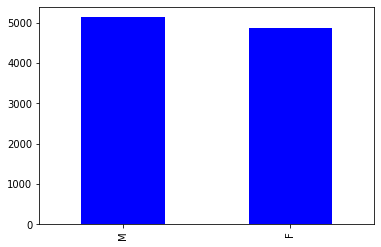

In [14]:
성별코드_count[:2].plot(kind='bar', color='b')
#수진자 중 남성의 비율이 여성의 비율보다 높다.

In [15]:
음주여부_count = health['음주여부'].value_counts()
print(음주여부_count[:2]) 

Yes    5819
No     4180
Name: 음주여부, dtype: int64


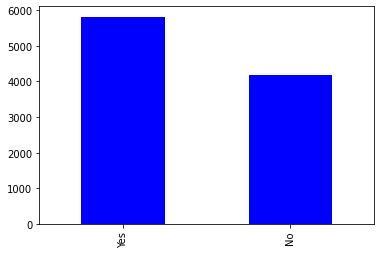

In [51]:
음주여부_count[:2].plot(kind='bar', color='b')
#수진자 중 술을 마시는 사람의 수가 그렇지 않은 사람보다 많다.

In [11]:
display(health[['HDL콜레스테롤',  'LDL콜레스테롤']])

,HDL콜레스테롤,LDL콜레스테롤
0,58.0,118.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,53.0,133.0
...,...,...
9995,NaN,NaN
9996,NaN,NaN
9997,NaN,NaN
9998,NaN,NaN


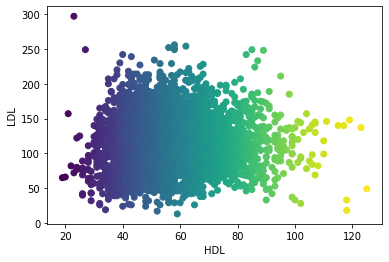

In [22]:
colors = health['HDL콜레스테롤'].astype("category").cat.codes

plt.scatter(health['HDL콜레스테롤'], health['LDL콜레스테롤'],c=colors)
plt.xlabel('HDL')
plt.ylabel('LDL')
plt.show()

#hdl콜레스테롤과 ldl콜레스테롤 각 값의 최솟값, 최댓값에 가까운 곳에 위치한 점들을 봤을 때,
#두 변수가 '음의 상관관계'에 있음을 알 수 있다.

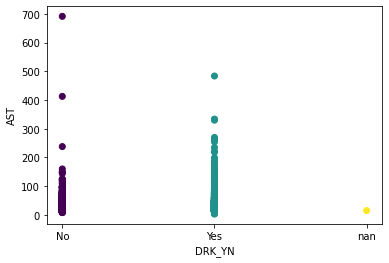

In [24]:
colors = health['음주여부'].astype("category").cat.codes

plt.scatter(health['음주여부'], health['(혈청지오티)AST'],c=colors)
plt.xlabel('DRK_YN')
plt.ylabel('AST')
plt.show()
#술을 마시는 사람의 경우 그렇지 않은 사람보다 (혈청지오티)AST의 농도가 높은 경우가 다수 존재한다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


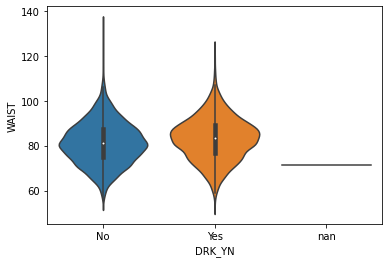

In [36]:
import seaborn as sns

sns.violinplot(health['음주여부'], health['허리둘레'])
plt.xlabel('DRK_YN')
plt.ylabel('WAIST')
plt.show()
#술을 마시는 사람들의 허리둘레 값이 그렇지 않은 사람들의 허리둘레 값보다 크다. 
#각 바이올린 플롯의 가장 튀어나온 부분이 음주를 하지 않는 경우에는 80cm를, 음주를 하는 경우에는 90cm에 조금 못미치는 부분에 위치한다.
#음주여부는 허리둘레와 어느정도 유의미한 상관관계가 있다고 볼 수 있다.

# **인사이트**

1.   수진자들의 거주지 중 가장 비율이 높은 다섯개 지역은 경기도, 서울특별시, 부산광역시, 경상남도, 인천광역시 순이다.
2.   수진자 중 남성의 비율이 여성의 비율보다 높다.
3.   수진자 중 술을 마시는 사람의 수가 그렇지 않은 사람보다 많다.
4.   hdl콜레스테롤과 ldl콜레스테롤은 '음의 상관관계'에 있음을 알 수 있다.
5.   술을 마시는 사람의 경우 그렇지 않은 사람보다 (혈청지오티)AST의 농도가 높은 경우가 다수 존재한다.
6.   술을 마시는 사람들의 허리둘레 값이 그렇지 않은 사람들의 허리둘레 값보다 크다. 
